In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')

In [4]:
print(train_df.head())

   stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 

In [5]:
print(train_df.describe())

           stock_id       date_id  seconds_in_bucket  imbalance_size  \
count  5.237980e+06  5.237980e+06       5.237980e+06    5.237760e+06   
mean   9.928856e+01  2.415100e+02       2.700000e+02    5.715293e+06   
std    5.787176e+01  1.385319e+02       1.587451e+02    2.051591e+07   
min    0.000000e+00  0.000000e+00       0.000000e+00    0.000000e+00   
25%    4.900000e+01  1.220000e+02       1.300000e+02    8.453415e+04   
50%    9.900000e+01  2.420000e+02       2.700000e+02    1.113604e+06   
75%    1.490000e+02  3.610000e+02       4.100000e+02    4.190951e+06   
max    1.990000e+02  4.800000e+02       5.400000e+02    2.982028e+09   

       imbalance_buy_sell_flag  reference_price  matched_size     far_price  \
count             5.237980e+06     5.237760e+06  5.237760e+06  2.343638e+06   
mean             -1.189619e-02     9.999955e-01  4.510025e+07  1.001713e+00   
std               8.853374e-01     2.532497e-03  1.398413e+08  7.214705e-01   
min              -1.000000e+00     

In [6]:
print(train_df.isnull().sum())


stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


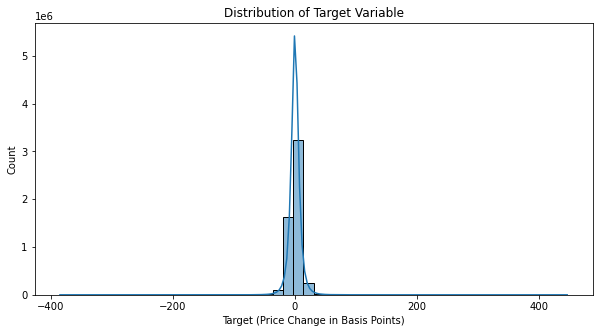

In [7]:
# Visualize the distribution of the target variable (price change)
plt.figure(figsize=(10, 5))
sns.histplot(train_df['target'], bins=50, kde=True)
plt.xlabel('Target (Price Change in Basis Points)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

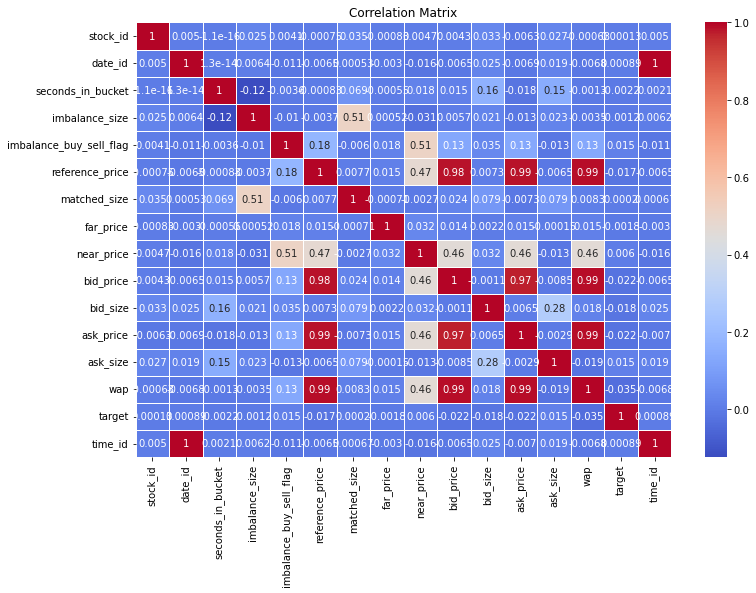

In [8]:
# Visualize the correlation matrix of numerical features
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

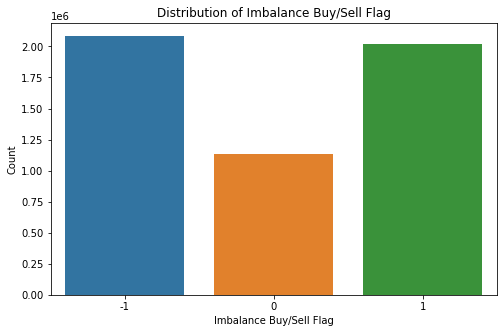

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='imbalance_buy_sell_flag', data=train_df)
plt.xlabel('Imbalance Buy/Sell Flag')
plt.ylabel('Count')
plt.title('Distribution of Imbalance Buy/Sell Flag')
plt.show()

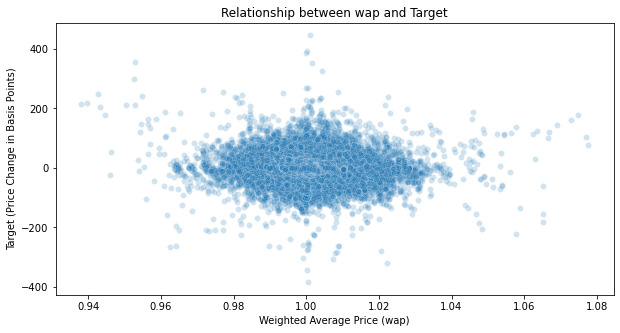

In [10]:
# Explore relationships between features and the target variable
plt.figure(figsize=(10, 5))
sns.scatterplot(x='wap', y='target', data=train_df, alpha=0.2)
plt.xlabel('Weighted Average Price (wap)')
plt.ylabel('Target (Price Change in Basis Points)')
plt.title('Relationship between wap and Target')
plt.show()

In [12]:
train_df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [18]:
data = train_df.drop(['far_price', 'near_price', 'row_id', 'time_id'], axis=1)

In [19]:
data.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.0,-7.349849


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aryan\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [54]:
nrows = 300000  # Adjust the number of rows as needed
data = pd.read_csv('train.csv', nrows=nrows)

# Define features and target (adjust column names as needed)
# For this example, let's assume 'wap' and 'bid_price1' are features, and 'target' is the target variable.
features = ['stock_id', 'date_id', 'seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price','ask_size','wap']
target = 'target'

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


In [55]:
model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)
model.fit(X_train, y_train)


C:\Users\aryan\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

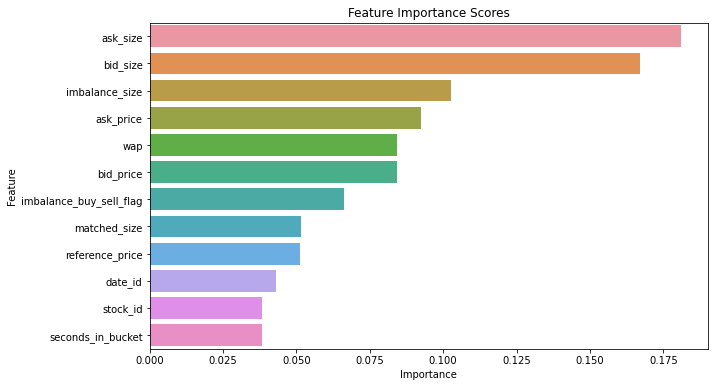

In [56]:
feature_importance = model.feature_importances_
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Scores')
plt.show()